## Football Hackathon 
### Data-Driven Player Performance Assessment
__Objective__

The main goal of the problem is to develop a machine learning algorithm that predicts the scout-made evaluation of players in the context of given matches.

In the following notebooks we will go through the implementation of following steps

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring

# 1. Data Analysis
Let's go ahead and load the dataset.

__Import Necessary libraries__

In [143]:
# to handle datasets
import pandas as pd
import numpy as np
import math

#using pandas_summary finding the insight of whole data frame in oneshot
from pandas_summary import DataFrameSummary

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

import pickle

import warnings
# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

At intial stage we load the csv file, and save to pickle file, as pickle file is more faster

In [111]:
# # load train and test dataset
# data = pd.read_csv('train.csv')
# data_test = pd.read_csv('test.csv')

Saving CSV file to pickle file

In [112]:
# #Saving csv file into pickle file
# with open('data_train', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('data_test', 'wb') as handle:
#     pickle.dump(data_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

__Load the saved pickle file__

In [113]:
#load load train and test dataset after converting csv file to pickle file
with open('data_train', 'rb') as handle:
    data_train = pickle.load(handle)
    
with open('data_test', 'rb') as handle:
    data_test = pickle.load(handle)

In [114]:
#function for data overview, like shape of dataset, datatypes, and five number summary

def data_overiew(df,message):
    print('{}{}\033[1m {} \033[0m {}{}\n'.format('<'*4,'-'*40,message,'-'*40,'>'*4))
    print('\033[1mNumber of rows: \033[0m', df.shape[0])
    print("\n\033[1mNumber of features: \033[0m", df.shape[1])
    
    print('\n{}{}\033[1m {} \033[0m {}{}\n'.format('<'*3,'-'*35,'Top 5 Rows','-'*35,'>'*3))
    display(df.head(5))
    
    print("\n\033[1mData types\033[0m")
    display(pd.DataFrame(df.dtypes).T)
   
    print("\n\033[1mFive Number Summary for Analysis:\033[0m")
    df_summary = DataFrameSummary(df)
    display(df_summary.summary())
    print('{}{}\033[1m {} \033[0m {}{}\n'.format('<'*4,'-'*50,"xxxxx END xxxxxx",'-'*50,'>'*4))

Let's call the above defined function of __Data Overview__

In [115]:
#Lets get the overview of train data

data_overiew(data_train,"Data Overview - Train Set")

<<<<---------------------------------------- Data Overview - Train Set  ---------------------------------------->>>>

Number of rows:  20453

Number of features:  800

<<<----------------------------------- Top 5 Rows  ----------------------------------->>>



row_id  scout_id  rating_num  winner   team  competitionId  \
0       1        13         7.0  winner  team1              8   
1       3        16         6.5   loser  team2              8   
2       4         4         8.5   loser  team1              5   
3       5        13         8.0   loser  team2              4   
4       7        11         3.5    draw  team1              5   

   player_position_1  player_position_2  player_height  player_weight  \
0                7.0                7.0       0.317073           0.48   
1                3.0                9.0       0.463415           0.42   
2               11.0               11.0       0.682927           0.44   
3               17.0               17.0       0.682927           0.58   
4               10.0               10.0       0.731707           0.70   

   player_general_var_0  player_general_var_1  player_general_var_2  \
0                   0.0                     0                   0.0   
1                   0.0                     0                   0.0   
2                   0.0                     0                   0.0   
3                   0.0                     0                   0.0   
4                   0.0                     0                   0.0   

   player_general_var_3  player_general_var_4  player_general_var_5  \
0                   0.0              0.114754                  0.00   
1                   0.0              0.081967                  0.00   
2                   0.0              0.065574                  0.25   
3                   0.0              0.000000                  0.00   
4                   0.0              0.262295                  0.25   

   player_positional_raw_var_0  player_positional_raw_var_1  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_2  player_positional_raw_var_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_defensive_raw_var_4  player_defensive_raw_var_5  \
0                      0.0000                         0.0   
1                      0.0625                         0.0   
2                      0.1875                         0.0   
3                      0.0000                         0.0   
4                      0.0000                         0.0   

   player_other_raw_var_6  player_offensive_raw_var_7  player_other_raw_var_8  \
0                0.467550                         0.0                     0.0   
1                0.436467                         0.0                     0.0   
2                0.631370                         0.0                     0.0   
3                0.467550                         0.0                     0.0   
4                0.467550                         0.4                     0.0   

   player_other_raw_var_9  player_other_raw_var_10  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     0.0                      0.0   
4                     0.0                      0.0   

   player_offensive_raw_var_11  player_other_raw_var_12  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   

   player_other_raw_var_13 


Data types


row_id scout_id rating_num  winner    team competitionId player_position_1  \
0  int64    int64    float64  object  object         int64           float64   

  player_position_2 player_height player_weight player_general_var_0  \
0           float64       float64       float64              float64   

  player_general_var_1 player_general_var_2 player_general_var_3  \
0                int64              float64              float64   

  player_general_var_4 player_general_var_5 player_positional_raw_var_0  \
0              float64              float64                     float64   

  player_positional_raw_var_1 player_positional_raw_var_2  \
0                     float64                     float64   

  player_positional_raw_var_3 player_defensive_raw_var_4  \
0                     float64                    float64   

  player_defensive_raw_var_5 player_other_raw_var_6  \
0                    float64                float64   

  player_offensive_raw_var_7 player_other_raw_var_8 player_other_raw_var_9  \
0                    float64                float64                float64   

  player_other_raw_var_10 player_offensive_raw_var_11 player_other_raw_var_12  \
0                 float64                     float64                 float64   

  player_other_raw_var_13 player_other_raw_var_14  \
0                 float64                 float64   

  player_positional_raw_var_15 player_positional_raw_var_16  \
0                      float64                      float64   

  player_positional_raw_var_17 player_other_raw_var_18  \
0                      float64                 float64   

  player_other_raw_var_19 player_other_raw_var_20  \
0                 float64                 float64   

  player_positional_raw_var_21 player_positional_raw_var_22  \
0                      float64                      float64   

  player_positional_raw_var_23 player_other_raw_var_24  \
0                      float64                 float64   

  player_other_raw_var_25 player_other_raw_var_26 player_other_raw_var_27  \
0                 float64                 float64                 float64   

  player_other_raw_var_28 player_other_raw_var_29 player_other_raw_var_30  \
0                 float64                 float64                 float64   

  player_offensive_raw_var_31 player_offensive_raw_var_32  \
0                     float64                     float64   

  player_other_raw_var_33 player_other_raw_var_34 player_other_raw_var_35  \
0                 float64                 float64                 float64   

  player_other_raw_var_36 player_other_raw_var_37 player_other_raw_var_38  \
0                 float64                 float64                 float64   

  player_other_raw_var_39 player_other_raw_var_40 player_other_raw_var_41  \
0                 float64                 float64                 float64   

  player_defensive_raw_var_42 player_defensive_raw_var_43  \
0                     float64                     float64   

  player_other_raw_var_44 player_other_raw_var_45 player_offensive_raw_var_46  \
0                 float64                 float64                     float64   

  player_other_raw_var_47 player_defensive_raw_var_48  \
0                 float64                     float64   

  player_offensive_raw_var_49 player_offensive_raw_var_50  \
0                     float64                     float64   

  player_other_raw_var_51 player_defensive_raw_var_52  \
0                 float64                     float64   

  player_offensive_raw_var_53 player_other_raw_var_54  \
0                     float64                 float64   

  player_positional_raw_var_55 player_other_raw_var_56  \
0                      float64                 float64   

  player_other_raw_var_57 player_other_raw_var_58 player_other_raw_var_59  \
0                 float64                 float64                 float64   

  player_offensive_raw_var_60 player_defensive_raw_var_61  \
0                     float64                 


Five Number Summary for Analysis:


row_id   scout_id rating_num       winner   team  \
count              20453.0    20453.0    20453.0          NaN    NaN   
mean          14257.557033  10.023566   6.887303          NaN    NaN   
std            8353.543104   5.712044   1.852367          NaN    NaN   
min                    1.0        1.0        0.0          NaN    NaN   
25%                 7048.0        3.0        6.0          NaN    NaN   
50%                14093.0       12.0        6.5          NaN    NaN   
75%                21381.0       15.0        8.0          NaN    NaN   
max                29227.0       26.0       10.0          NaN    NaN   
counts               20453      20453      20453        20453  20453   
uniques              20453         21         13            3      2   
missing                  0          0          0            0      0   
missing_perc            0%         0%         0%           0%     0%   
types              numeric    numeric    numeric  categorical   bool   

             competitionId player_position_1 player_position_2 player_height  \
count              20453.0           20378.0           20378.0       20451.0   
mean              7.311837          7.609481          8.012612      0.496925   
std               2.345699          5.059591          4.913142      0.160769   
min                    4.0               1.0               1.0       0.02439   
25%                    5.0               3.0               3.0      0.390244   
50%                    7.0               7.0               8.0      0.512195   
75%                    9.0              11.0              11.0      0.609756   
max                   15.0              23.0              23.0       0.97561   
counts               20453             20378             20378         20451   
uniques                 10                22                22            39   
missing                  0                75                75             2   
missing_perc            0%             0.37%             0.37%         0.01%   
types              numeric           numeric           numeric       numeric   

             player_weight player_general_var_0 player_general_var_1  \
count              20451.0              20453.0              20453.0   
mean              0.455471             0.029717             0.003276   
std               0.140848             0.082089             0.057142   
min                   0.04                  0.0                  0.0   
25%                   0.34                  0.0                  0.0   
50%                   0.44                  0.0                  0.0   
75%                   0.54                  0.0                  0.0   
max                    1.0                  1.0                  1.0   
counts               20451                20453                20453   
uniques                 46                    6                    2   
missing                  2                    0                    0   
missing_perc         0.01%                   0%                   0%   
types              numeric              numeric                 bool   

             player_general_var_2 player_general_var_3 player_general_var_4  \
count                     20453.0              20453.0              20453.0   
mean                     0.088648             0.004456              0.13954   
std                      0.225635             0.056593               0.1315   
min                           0.0                  0.0                  0.0   
25%                           0.0                  0.0              0.04918   
50%                           0.0                  0.0             0.114754   
75%                           0.0                  0.0             0.188525   
max                      0.980392             0.990099             0.803279   
counts                      20453                20453                20453   
uniques                       101                   61                   93   
missing     

<<<<-------------------------------------------------- xxxxx END xxxxxx  -------------------------------------------------->>>>



In [116]:
#Lets get the overview of test data

data_overiew(data_test,"Data Overview - Test Set")

<<<<---------------------------------------- Data Overview - Test Set  ---------------------------------------->>>>

Number of rows:  8774

Number of features:  799

<<<----------------------------------- Top 5 Rows  ----------------------------------->>>



row_id  scout_id  winner   team  competitionId  player_position_1  \
0   14785        16    draw  team1            7.0                4.0   
1   15125         2    draw  team1            9.0               11.0   
2   13095        16   loser  team2           10.0               19.0   
3    6079        16   loser  team1           11.0                3.0   
4   16584        11  winner  team1            5.0                4.0   

   player_position_2  player_height  player_weight  player_general_var_0  \
0                4.0       0.317073           0.44                   0.0   
1               11.0       0.560976           0.60                   0.0   
2               19.0       0.195122           0.30                   0.0   
3                9.0       0.341463           0.30                   0.0   
4                4.0       0.585366           0.70                   0.2   

   player_general_var_1  player_general_var_2  player_general_var_3  \
0                     0              0.803922                   0.0   
1                     0              0.000000                   0.0   
2                     0              0.000000                   0.0   
3                     0              0.000000                   0.0   
4                     0              0.000000                   0.0   

   player_general_var_4  player_general_var_5  player_positional_raw_var_0  \
0              0.114754                  0.00                     0.166667   
1              0.229508                  0.00                     0.000000   
2              0.049180                  0.25                     0.000000   
3              0.073770                  0.00                     0.000000   
4              0.106557                  0.00                     0.000000   

   player_positional_raw_var_1  player_positional_raw_var_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   player_positional_raw_var_3  player_defensive_raw_var_4  \
0                          0.0                      0.0625   
1                          0.0                      0.0625   
2                          0.0                      0.0000   
3                          0.0                      0.0000   
4                          0.0                      0.0000   

   player_defensive_raw_var_5  player_other_raw_var_6  \
0                         0.0                0.467550   
1                         0.0                0.287744   
2                         0.0                0.467550   
3                         0.0                0.467550   
4                         0.0                0.359680   

   player_offensive_raw_var_7  player_other_raw_var_8  player_other_raw_var_9  \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.2                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   

   player_other_raw_var_10  player_offensive_raw_var_11  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   player_other_raw_var_12  player_other_raw_var_13  player_other_raw_var_14  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0              


Data types


row_id scout_id  winner    team competitionId player_position_1  \
0  int64    int64  object  object       float64           float64   

  player_position_2 player_height player_weight player_general_var_0  \
0           float64       float64       float64              float64   

  player_general_var_1 player_general_var_2 player_general_var_3  \
0                int64              float64              float64   

  player_general_var_4 player_general_var_5 player_positional_raw_var_0  \
0              float64              float64                     float64   

  player_positional_raw_var_1 player_positional_raw_var_2  \
0                     float64                     float64   

  player_positional_raw_var_3 player_defensive_raw_var_4  \
0                     float64                    float64   

  player_defensive_raw_var_5 player_other_raw_var_6  \
0                    float64                float64   

  player_offensive_raw_var_7 player_other_raw_var_8 player_other_raw_var_9  \
0                    float64                float64                float64   

  player_other_raw_var_10 player_offensive_raw_var_11 player_other_raw_var_12  \
0                 float64                     float64                 float64   

  player_other_raw_var_13 player_other_raw_var_14  \
0                 float64                 float64   

  player_positional_raw_var_15 player_positional_raw_var_16  \
0                      float64                      float64   

  player_positional_raw_var_17 player_other_raw_var_18  \
0                      float64                 float64   

  player_other_raw_var_19 player_other_raw_var_20  \
0                 float64                 float64   

  player_positional_raw_var_21 player_positional_raw_var_22  \
0                      float64                      float64   

  player_positional_raw_var_23 player_other_raw_var_24  \
0                      float64                 float64   

  player_other_raw_var_25 player_other_raw_var_26 player_other_raw_var_27  \
0                 float64                 float64                 float64   

  player_other_raw_var_28 player_other_raw_var_29 player_other_raw_var_30  \
0                 float64                 float64                 float64   

  player_offensive_raw_var_31 player_offensive_raw_var_32  \
0                     float64                     float64   

  player_other_raw_var_33 player_other_raw_var_34 player_other_raw_var_35  \
0                 float64                 float64                 float64   

  player_other_raw_var_36 player_other_raw_var_37 player_other_raw_var_38  \
0                 float64                 float64                 float64   

  player_other_raw_var_39 player_other_raw_var_40 player_other_raw_var_41  \
0                 float64                 float64                 float64   

  player_defensive_raw_var_42 player_defensive_raw_var_43  \
0                     float64                     float64   

  player_other_raw_var_44 player_other_raw_var_45 player_offensive_raw_var_46  \
0                 float64                 float64                     float64   

  player_other_raw_var_47 player_defensive_raw_var_48  \
0                 float64                     float64   

  player_offensive_raw_var_49 player_offensive_raw_var_50  \
0                     float64                     float64   

  player_other_raw_var_51 player_defensive_raw_var_52  \
0                 float64                     float64   

  player_offensive_raw_var_53 player_other_raw_var_54  \
0                     float64                 float64   

  player_positional_raw_var_55 player_other_raw_var_56  \
0                      float64                 float64   

  player_other_raw_var_57 player_other_raw_var_58 player_other_raw_var_59  \
0                 float64                 float64                 float64   

  player_offensive_raw_var_60 player_defensive_raw_var_61  \
0                     float64                     float64   

  play


Five Number Summary for Analysis:


row_id  scout_id       winner   team competitionId  \
count               8774.0    8774.0          NaN    NaN        8773.0   
mean          15444.901299  9.831206          NaN    NaN      7.663399   
std            8572.358996  5.915656          NaN    NaN      2.569042   
min                    2.0       1.0          NaN    NaN           4.0   
25%                7961.75       3.0          NaN    NaN           5.0   
50%                15863.0      12.0          NaN    NaN           8.0   
75%               23092.75      15.0          NaN    NaN          10.0   
max                29225.0      26.0          NaN    NaN          15.0   
counts                8774      8774         8774   8773          8773   
uniques               8774        19            3      2            10   
missing                  0         0            0      1             1   
missing_perc            0%        0%           0%  0.01%         0.01%   
types              numeric   numeric  categorical   bool       numeric   

             player_position_1 player_position_2 player_height player_weight  \
count                   8699.0            8699.0        8742.0        8737.0   
mean                  7.823083          8.236464      0.482097      0.449644   
std                   5.046151          4.875792      0.158755      0.136978   
min                        1.0               1.0           0.0          0.04   
25%                        3.0               4.0      0.365854          0.36   
50%                        7.0               8.0      0.487805          0.44   
75%                       11.0              11.0      0.585366          0.54   
max                       23.0              23.0           1.0          0.96   
counts                    8699              8699          8742          8737   
uniques                     22                22            42            45   
missing                     75                75            32            37   
missing_perc             0.85%             0.85%         0.36%         0.42%   
types                  numeric           numeric       numeric       numeric   

             player_general_var_0 player_general_var_1 player_general_var_2  \
count                      8774.0               8774.0               8774.0   
mean                     0.023114             0.003761             0.084755   
std                      0.072248             0.061216             0.219083   
min                           0.0                  0.0                  0.0   
25%                           0.0                  0.0                  0.0   
50%                           0.0                  0.0                  0.0   
75%                           0.0                  0.0                  0.0   
max                           1.0                  1.0             0.980392   
counts                       8774                 8774                 8774   
uniques                         6                    2                  101   
missing                         0                    0                    0   
missing_perc                   0%                   0%                   0%   
types                     numeric                 bool              numeric   

             player_general_var_3 player_general_var_4 player_general_var_5  \
count                      8774.0               8774.0               8774.0   
mean                     0.004393             0.155258             0.013705   
std                      0.055515             0.148061             0.061831   
min                           0.0                  0.0                  0.0   
25%                           0.0             0.057377                  0.0   
50%                           0.0             0.131148                  0.0   
75%                           0.0             0.196721                  0.0   
max                      0.950495                  1.0                  1.0   
counts                       8774           

<<<<-------------------------------------------------- xxxxx END xxxxxx  -------------------------------------------------->>>>



__Observation__

__Train Data Set__
* Dataset contains 20453 rows and 800 columns i.e variables
* 799 are predictive variables and 1 are target variables here __rating_num_
* from 5 number summary its observed that some feature are total null values, and some are more than 85%
* Also we found that most of the feature has null values

__Test Data Set__
* Data set contains 8774 rows and 799 columns i.e variables, here all are predictive variables
* found null values here also, some variable are 100% null values

In [117]:
#lets set the target
target = 'rating_num'

From the above obsercation we found that both data set contain null values in many columns

Let's remove all the feature with 25% null values and imput rest with zeros

In [118]:
#function to find the variable with null values of given threshold and drop the column, rest feature impute with zeros

def Drop_null_imput_zeros(df,threshold):
    df_temp = df.copy()
    total_row = df.shape[0]
    null_columns=[]
    for col in df.columns[1:]:
        null_value_count = df[col].isnull().sum(axis = 0) #null values in column
        null_value_per = round((null_value_count/total_row)*100,2) # percentage of null values
        if(null_value_per >= threshold):
            null_columns.append(col)
            df_temp.drop(col, axis = 1, inplace=True)#drop column
        else:
            df_temp[col].replace(np.nan,0, inplace=True)#fill with zeros

    print("Total number of column drops : {}".format(len(null_columns)))
    return df_temp, null_columns

In [119]:
#droping feature with 25% null values and imput rest with zeros

#in train set
df_train_v1,null_col = Drop_null_imput_zeros(data_train,25)

Total number of column drops : 139


In [120]:
#Drop same column from test set also
df_test_v1 = data_test.copy()
df_test_v1.drop(null_col, axis = 1, inplace=True)

In [121]:
df_test_v1.replace(np.nan,0, inplace=True)#fill with zeros

__Shape of data after droping null columns__

In [122]:
print("New shape of trian data : ", df_train_v1.shape)
print("New shape of test data : ", df_test_v1.shape)

New shape of trian data :  (20453, 661)
New shape of test data :  (8774, 660)


### Analysis

Let's some deep drive in to the data
* Find target variable
* Variable types (categorical and Numrical)
* Find any missing data
* Check cardinality, rare labels or special mappings any in categorical variable
* Check what type of data in numerical variable like is it discrete, continuous, distributions or transformations values

__Target__: 

Lets begin by exploring the target distribution

In [123]:
#Analyze the distribution of the target variable

#function to visualise the target variable
def visualise_target_variable(data,target):
  df_target = data[target].copy()
  labels = sorted(df_target.unique())
 
  plt.figure(figsize=(13,7))
  plt.subplot(121)

  explode=np.zeros(len(labels))
  explode[1]=0.00
 
  print('\033[1m Target Variable Distribution\n') 

  #pie chart to dispay target distribution
  plt.pie(df_target.value_counts(), labels=df_target.value_counts().index, counterclock=False, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
  
  #bar chart to dispay target distribution
  plt.subplot(122)
  g = sns.countplot(x=target, data=data )
  sns.despine(left=True)
  for p in g.patches:
    height = p.get_height()
    #calculate percentage of each class
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_target)*100),
            ha="center", fontsize=12) 

  plt.show()  

__Visualise distribution of the target variable__

 Target Variable Distribution



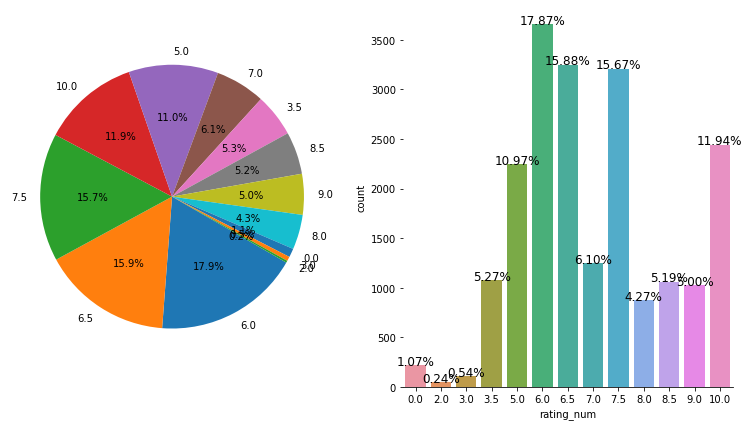

In [124]:
#distribution of target variable
visualise_target_variable(df_train_v1,target)

__Observation__

* Observation found that rating of 5,6 ,6.5,7.5 and 10 given to maximum player, almost 72% player has this rating
* Let also find teamvise reating given to player

In [125]:
#Analyze the distribution of the target variable

#function to visualise the target variable
def Compare_team_rating(team1,team2,target):
  df_target = team1[target].copy()
  labels = sorted(df_target.unique())
 
  plt.figure(figsize=(13,7))
  plt.subplot(121)
 
  print('\033[1mTeam1 and Team 2 Rating \n') 

  #pie chart to dispay target distribution
  g1 = sns.countplot(x=target, data=team1 )
  g1.set_title('Team1 Rating')
  sns.despine(left=True)
  for p in g1.patches:
    height = p.get_height()
    #calculate percentage of each class
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_target)*100),
            ha="center", fontsize=9) 
    
  #bar chart to dispay target distribution
  plt.subplot(122)
  g = sns.countplot(x=target, data=team2 )
  g.set_title('Team2 Rating')
  sns.despine(left=True)
  for p in g.patches:
    height = p.get_height()
    #calculate percentage of each class
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df_target)*100),
            ha="center", fontsize=9) 

  plt.show()  

Team1 and Team 2 Rating 



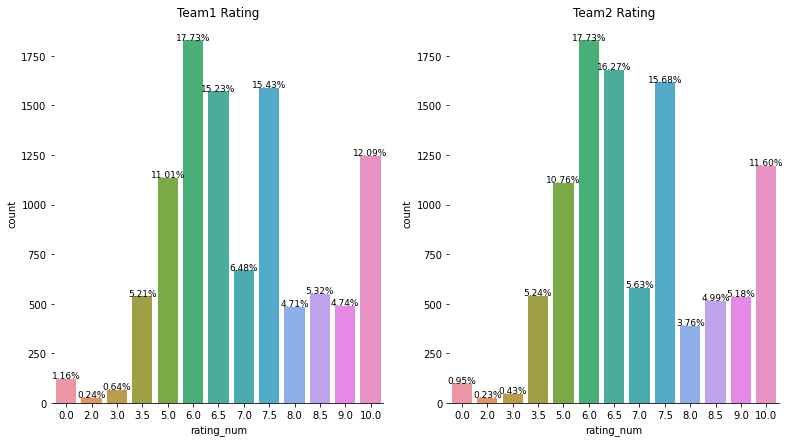

In [126]:
team1_data = df_train_v1[df_train_v1["team"] == 'team1']
team2_data = df_train_v1[df_train_v1["team"] == 'team2']

#visualize Team1 rating
Compare_team_rating(team1_data,team2_data,target)


__Observation__

* from above plot its shows that rating in both the team is near about equal,
* both team has good player

__Variable Types__

In [127]:
#categorical variable
cat_vars = [var for var in df_train_v1.columns if df_train_v1[var].dtype == 'O']
print("\033[1mCategorical Variabels: {}\n\n\033[0m".format(len(cat_vars)),list(cat_vars))

Categorical Variabels: 2

 ['winner', 'team']


In [128]:
#We also have other categorical variable,let manually assign same
other_cat_var = ['team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']
cat_vars.extend(other_cat_var)
print("\033[1mCategorical Variabels: {}\n\n\033[0m".format(len(cat_vars)),list(cat_vars))

Categorical Variabels: 7

 ['winner', 'team', 'team1_system_id', 'team2_system_id', 'competitionId', 'player_position_1', 'player_position_2']


__Number of labels: cardinality__

<AxesSubplot:>

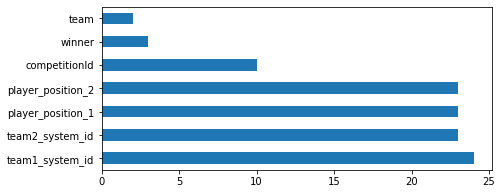

In [129]:
#Visualise the number of unique labels in categorical variables
df_train_v1[cat_vars].nunique().sort_values(ascending=False).plot.barh(figsize=(7,3))

__Numerical Variables__

In [130]:
#numerical variable
num_vars = [var for var in df_train_v1.columns if var not in cat_vars and var != target]
print("\033[1m\nNumerical Variables: {}\033[0m".format(len(num_vars)))


Numerical Variables: 653


## 2. Feature Engineering

__Let's Visualise the player_heigh and weight__

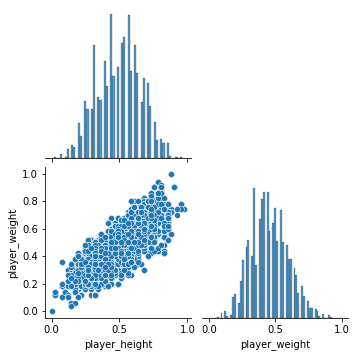

In [131]:
sns.pairplot( df_train_v1[['player_height','player_weight']],corner=True)

Player height and weight is seen as expected,as player wight is normally distributed, crating new feature by adding height and weight

In [132]:
df_train_v1['player_hw'] = df_train_v1['player_height']+ df_train_v1['player_weight']
df_test_v1['player_hw'] = df_test_v1['player_height']+ df_test_v1['player_weight']

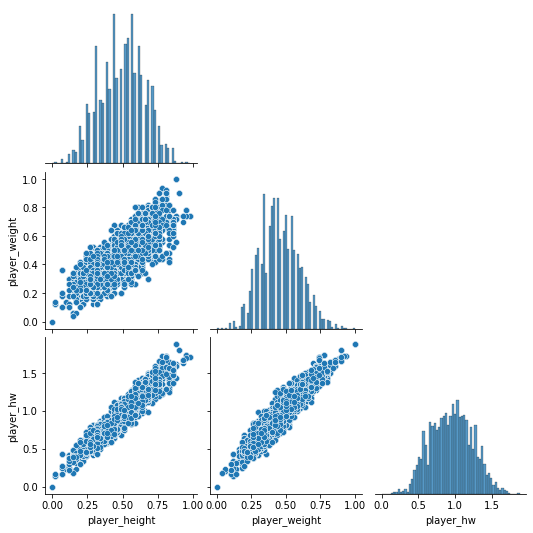

In [133]:
#Lets check its effect
sns.pairplot(df_train_v1[['player_height','player_weight','player_hw']],corner=True)

__Observation__
* new feture created from player_height and player_weight, i.e player_hw is more gausian distributed

In [134]:
#Its looke like new feature is more linar, so dropping player height and weight
drop_cols = ['player_height','player_weight']
df_train_v1.drop(drop_cols, axis = 1, inplace=True)
df_test_v1.drop(drop_cols, axis = 1, inplace=True)

__Visualise which team is the most winner__

<AxesSubplot:xlabel='winner', ylabel='count'>

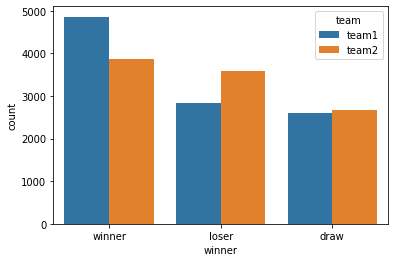

In [135]:
sns.countplot(x=df_train_v1['winner'],data = df_train_v1,hue=df_train_v1['team']) 

Observation shows that team1 has ween more maches than team2

__Player has encoded into offensive, defensive, positional, physical, general, and other__

Let's see the insight on these variables

In [162]:
def visualise_numrical_data(df,features):
    n=5
    plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
    for c in range(len(features)):
        plt.subplot(math.ceil(len(features)/3),n,c+1)
        sns.distplot(df[features[c]])
    plt.tight_layout()
    plt.show()

__player_offensive__

In [159]:
player_offensive_var  = [var for var in df_train_v1.columns if 'player_offensive' in var ]
df_player_offensive = df_train_v1[player_offensive_var].copy()

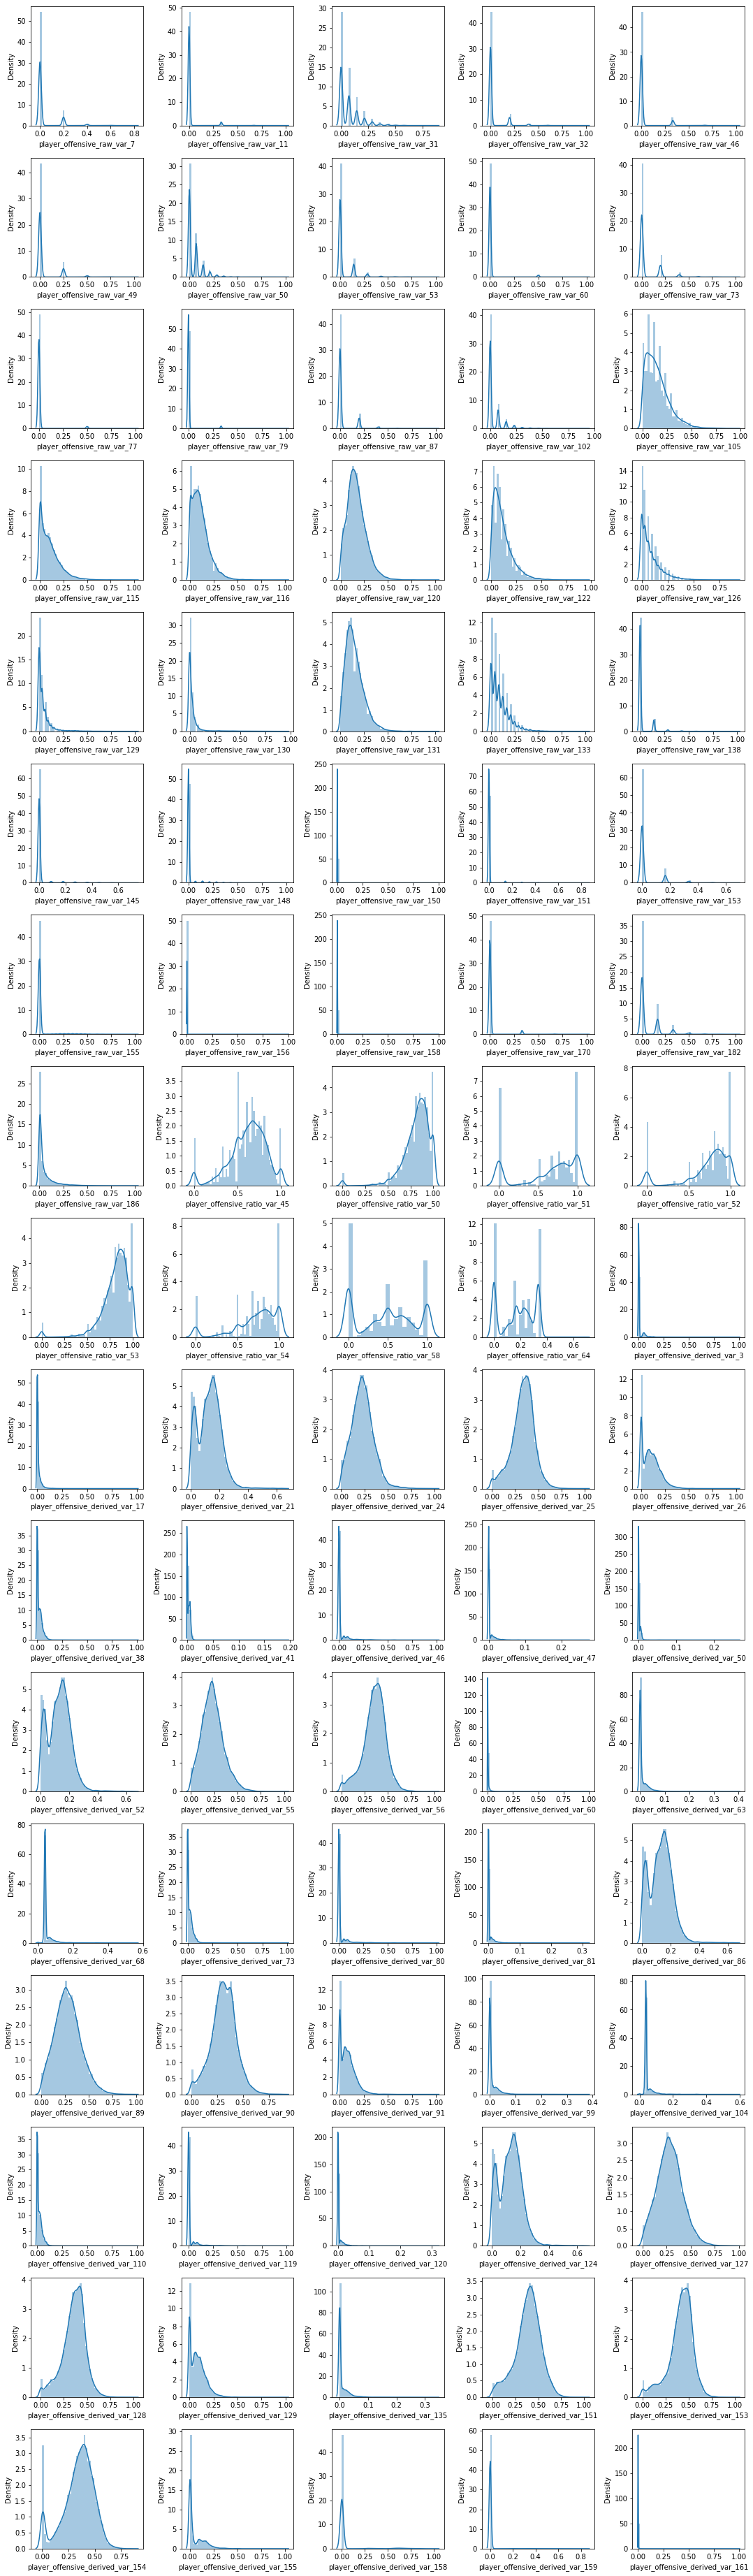

In [160]:
#visualise player offensive movement

visualise_numrical_data(df_player_offensive,player_offensive_var)

__player_defensive__

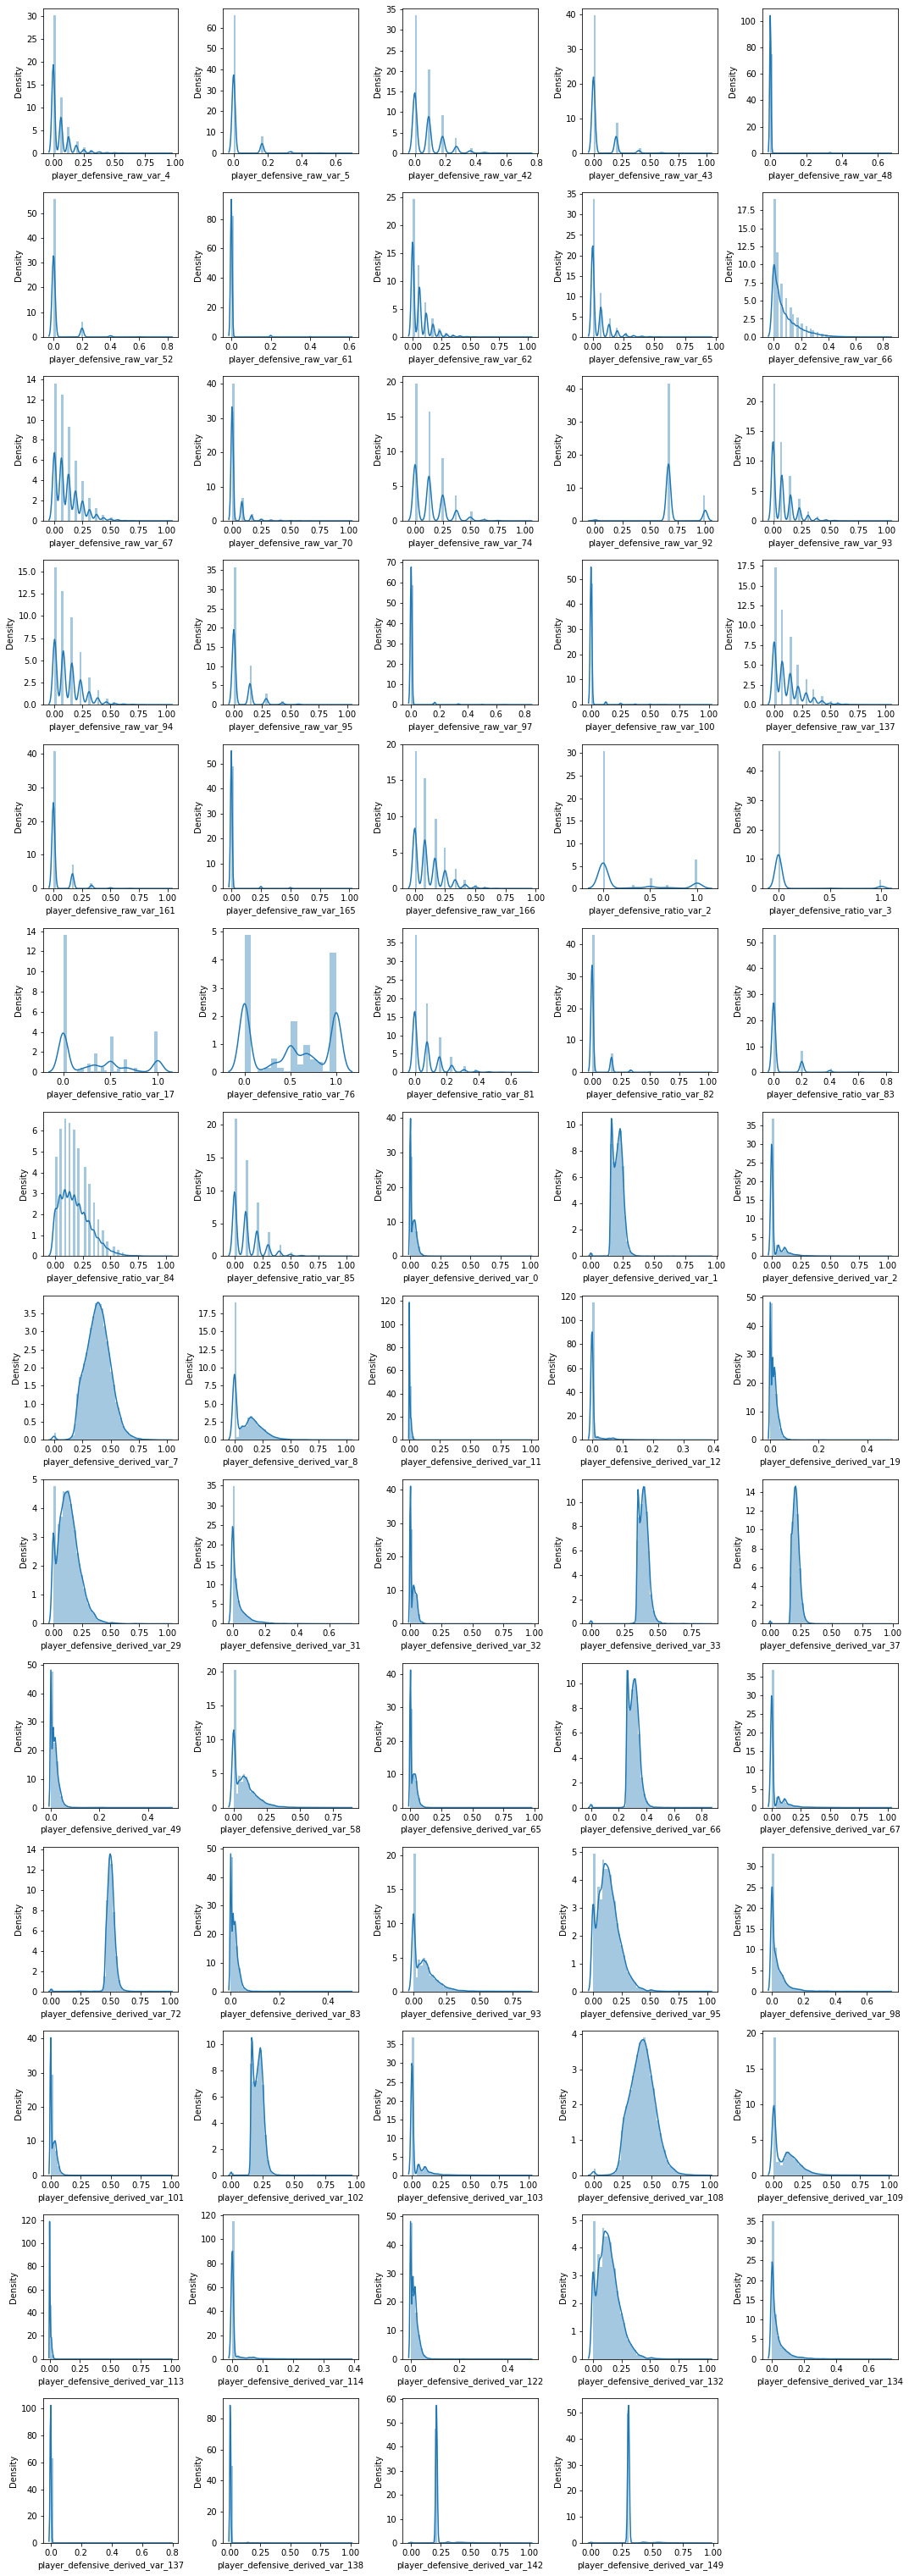

In [163]:
player_defensive_var  = [var for var in df_train_v1.columns if 'player_defensive' in var ]
df_player_defensive = df_train_v1[player_defensive_var].copy()

#visualise player_defensive movement
visualise_numrical_data(df_player_defensive,player_defensive_var)

__player_general__

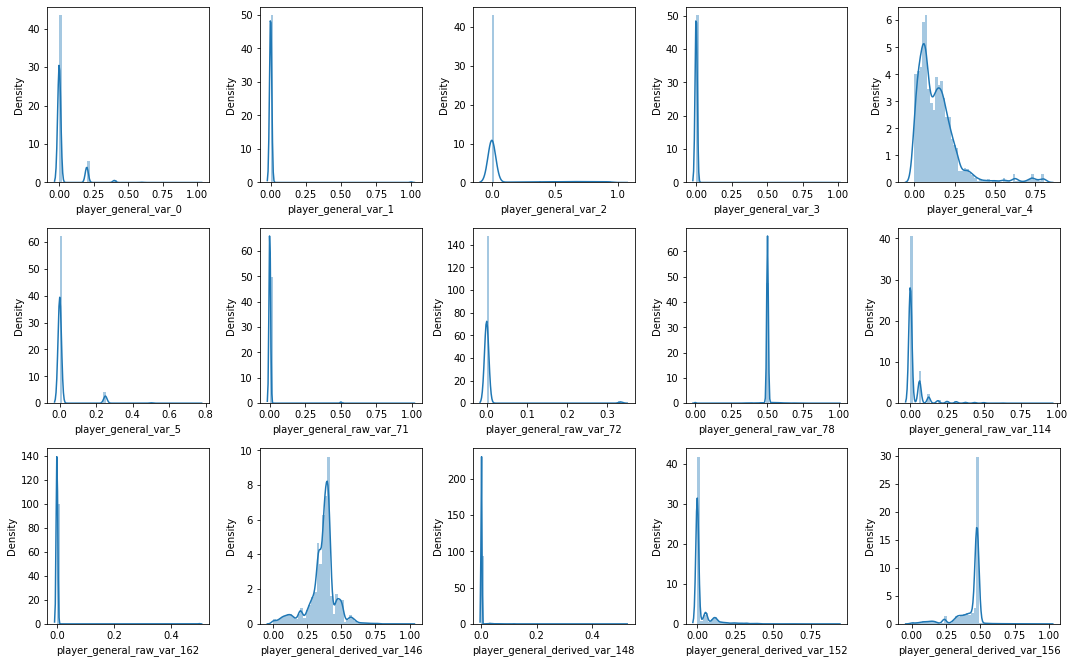

In [171]:
player_general_var  = [var for var in df_train_v1.columns if 'player_general' in var ]
df_player_general = df_train_v1[player_general_var].copy()

#visualise player_physical movement
visualise_numrical_data(df_player_general,player_general_var)

__player_positional__

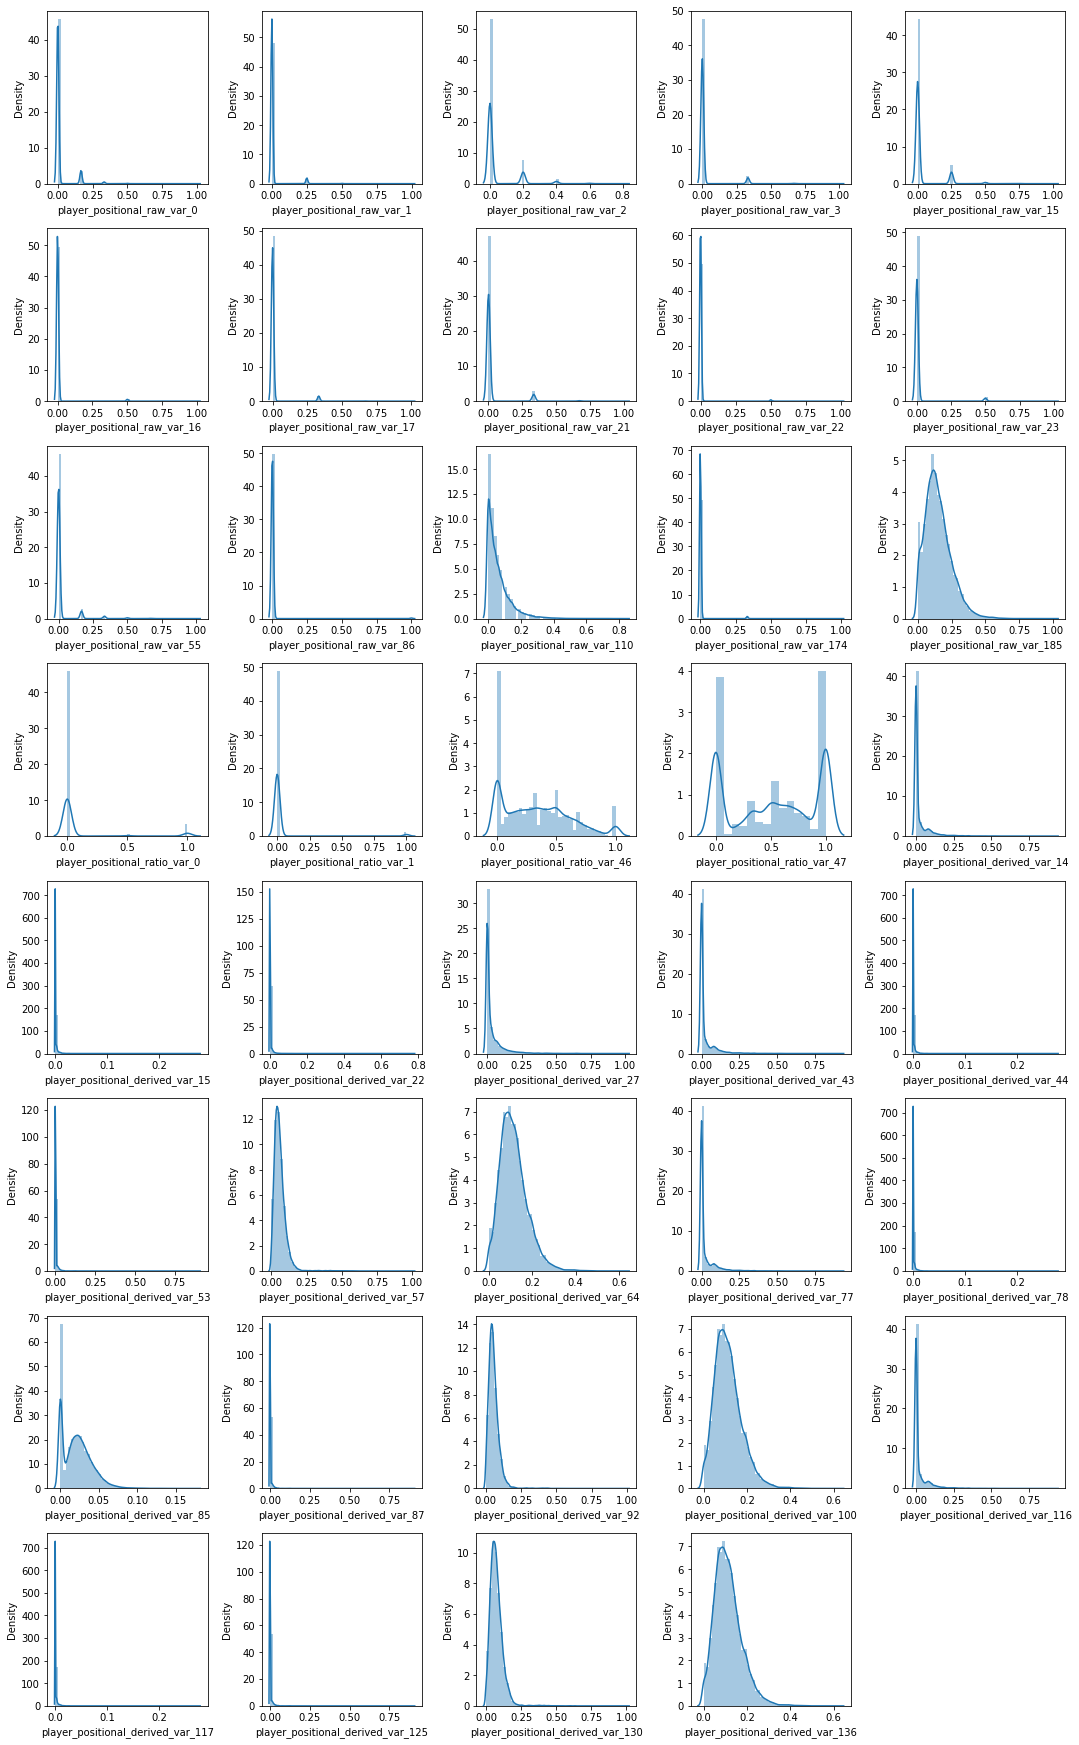

In [172]:
player_positional_var  = [var for var in df_train_v1.columns if 'player_positional' in var ]
df_player_positional = df_train_v1[player_positional_var].copy()

#visualise player_physical movement
visualise_numrical_data(df_player_positional,player_positional_var)

__player_other__

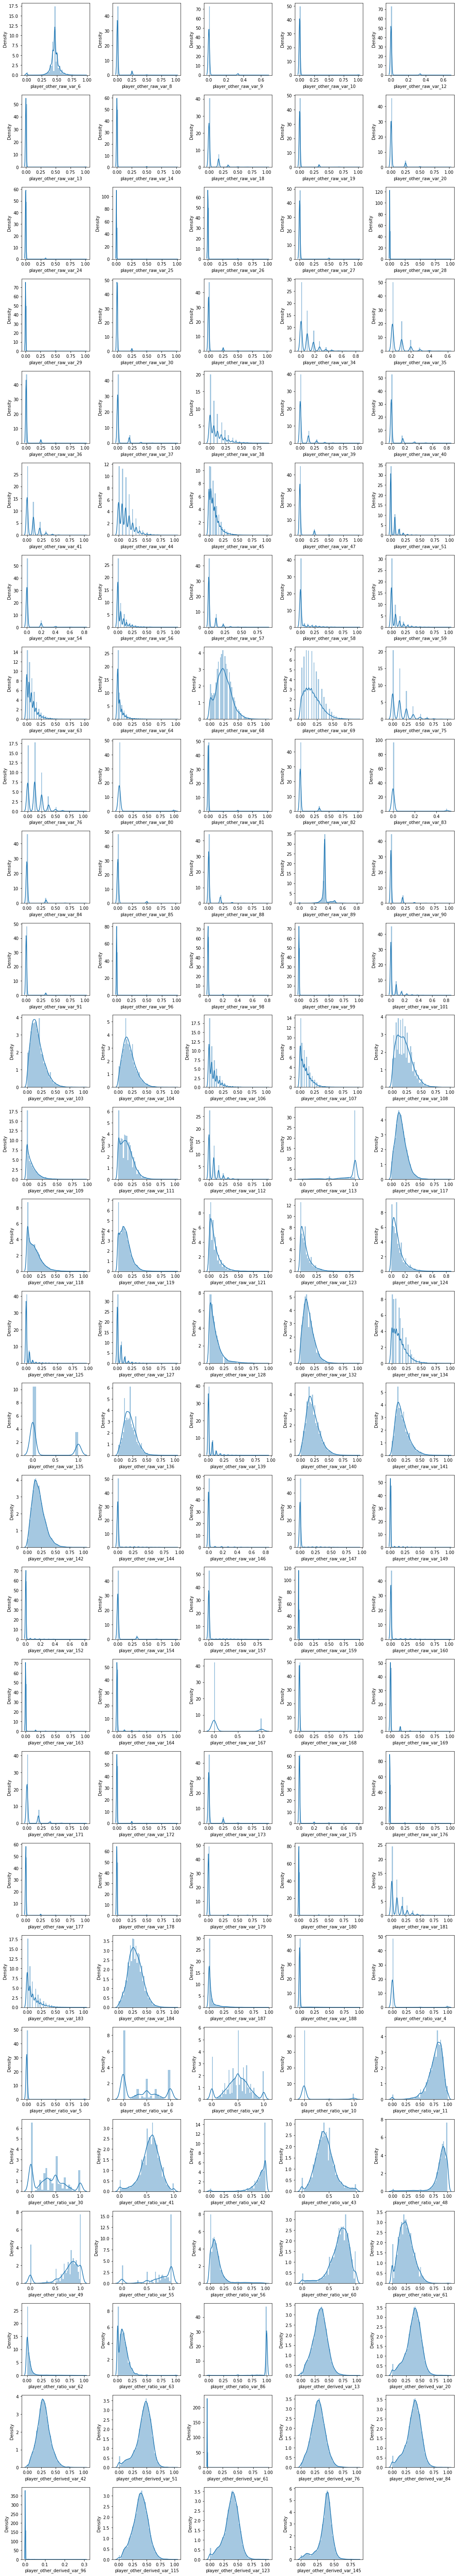

In [173]:
player_other_var  = [var for var in df_train_v1.columns if 'player_other' in var ]
df_player_other = df_train_v1[player_other_var].copy()

#visualise player_physical movement
visualise_numrical_data(df_player_other,player_other_var)

#### Lets find same in Team1

__Team1 defensive__

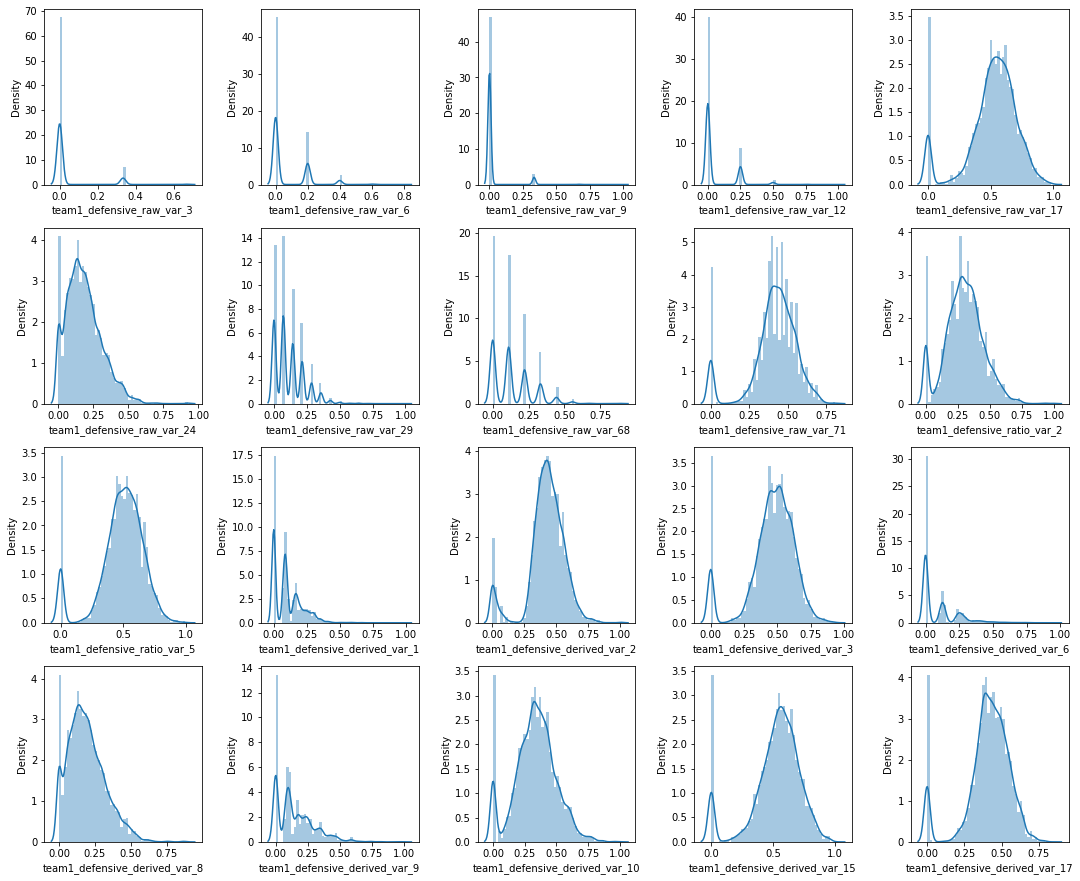

In [174]:
team1_defensive_var  = [var for var in df_train_v1.columns if 'team1_defensive' in var ]
df_team1_defensive = df_train_v1[team1_defensive_var].copy()

#visualise movement
visualise_numrical_data(df_team1_defensive,team1_defensive_var)

__team1_offensive__

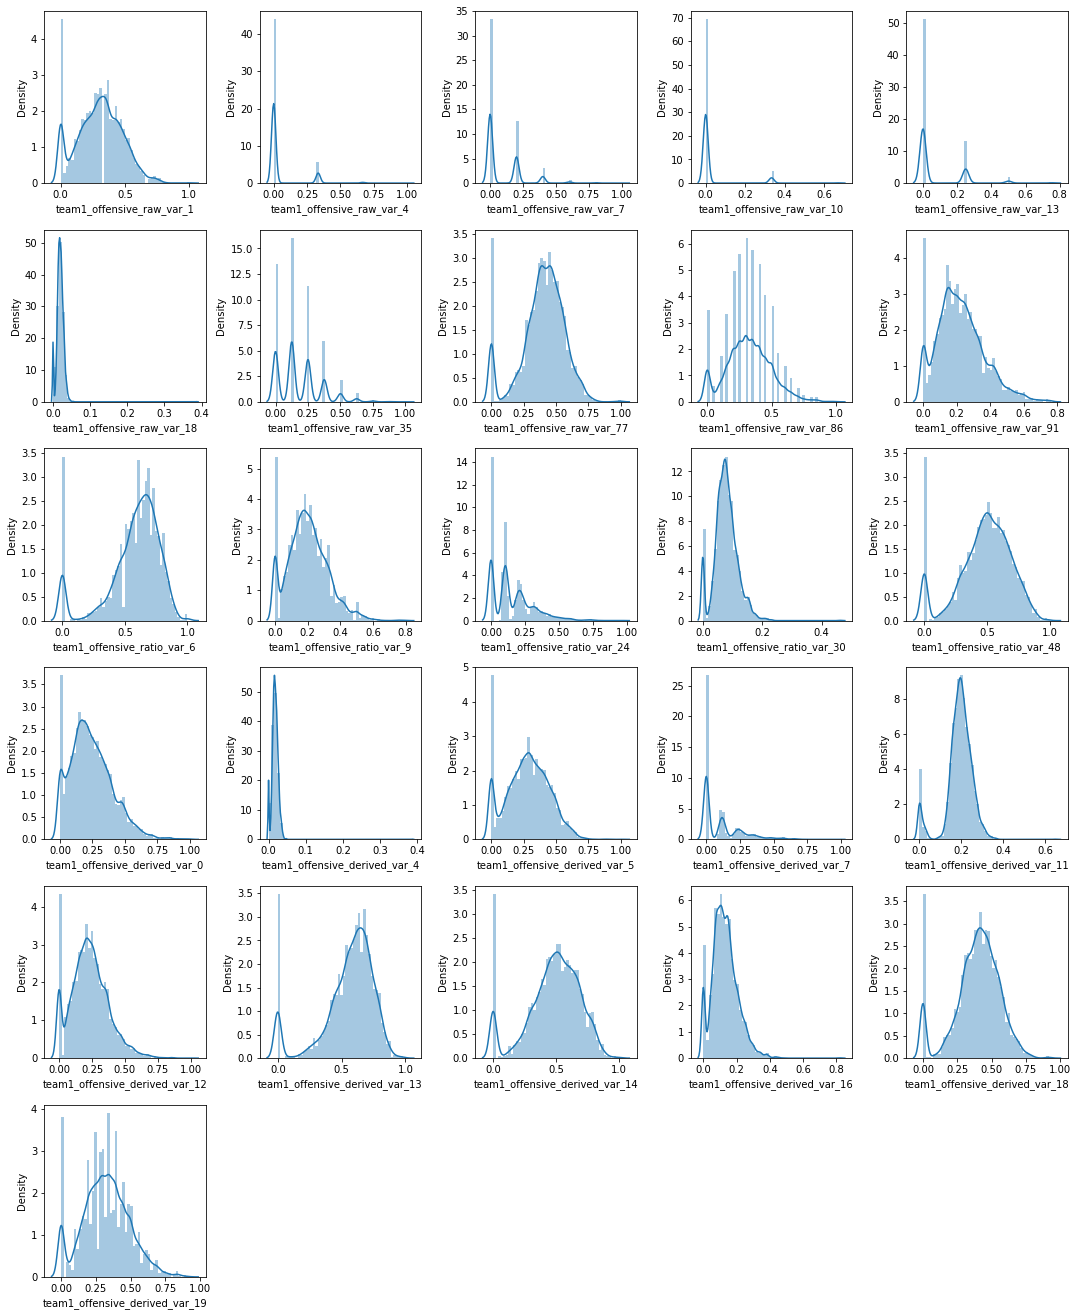

In [175]:
team1_offensive_var  = [var for var in df_train_v1.columns if 'team1_offensive' in var ]
df_team1_offensive = df_train_v1[team1_offensive_var].copy()

#visualise movement
visualise_numrical_data(df_team1_offensive,team1_offensive_var)

__team1_other__

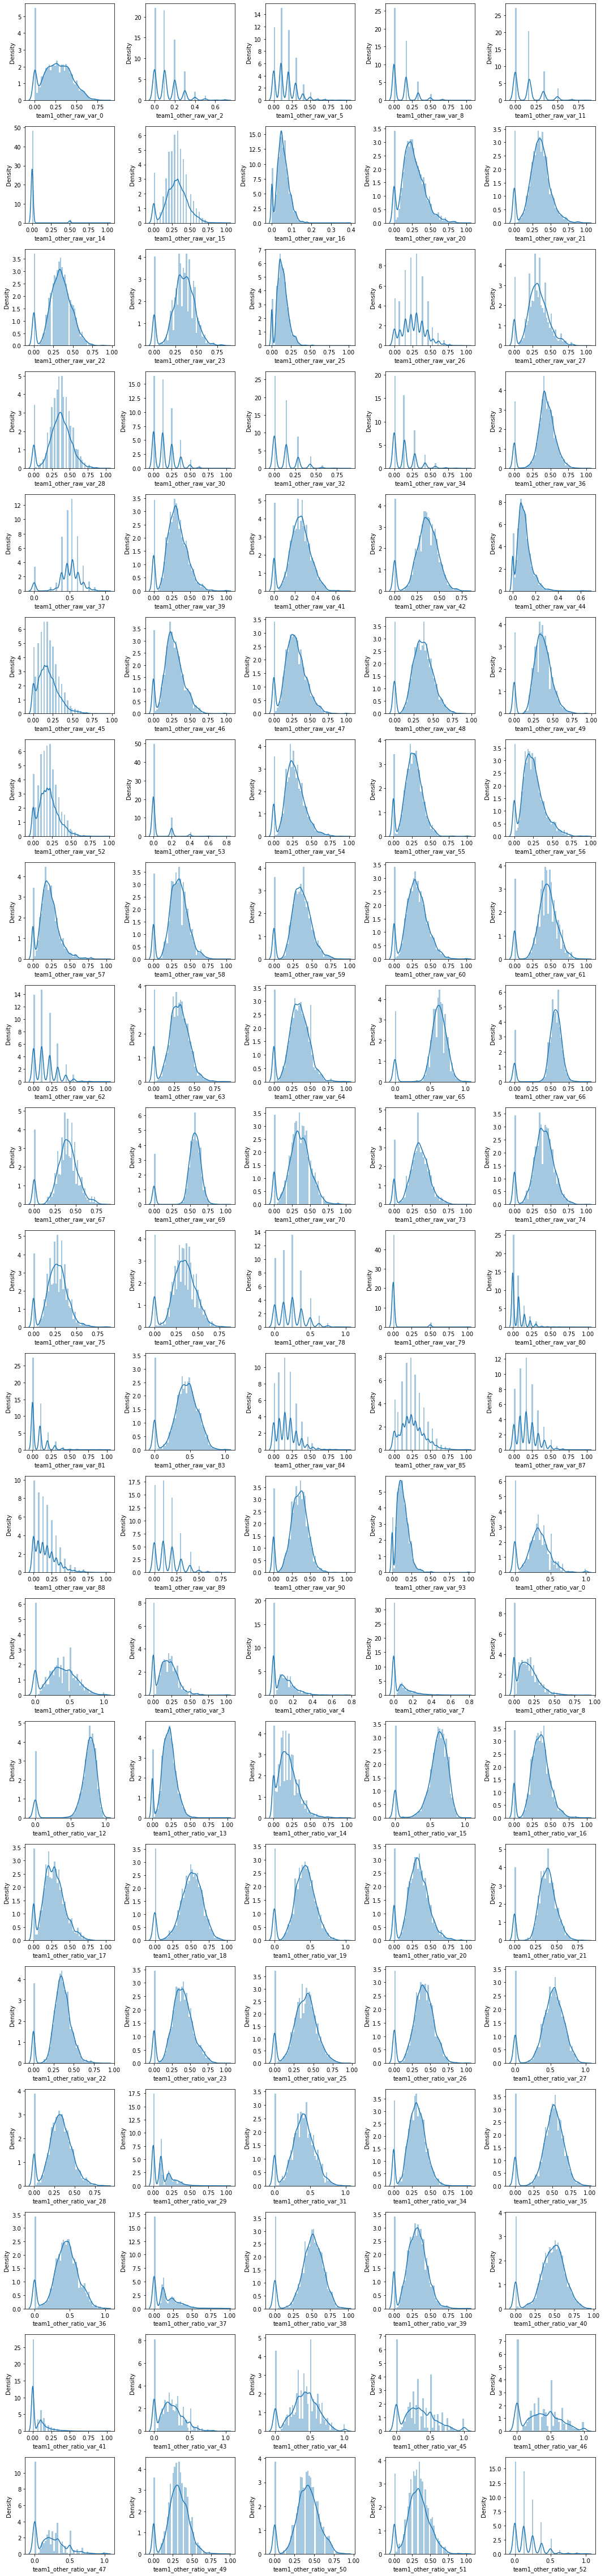

In [177]:
team1_other_var  = [var for var in df_train_v1.columns if 'team1_other' in var ]
df_team1_other = df_train_v1[team1_other_var].copy()

#visualise movement
visualise_numrical_data(df_team1_other,team1_other_var)

### Lets find same in Team2

__Team2 Defensive__

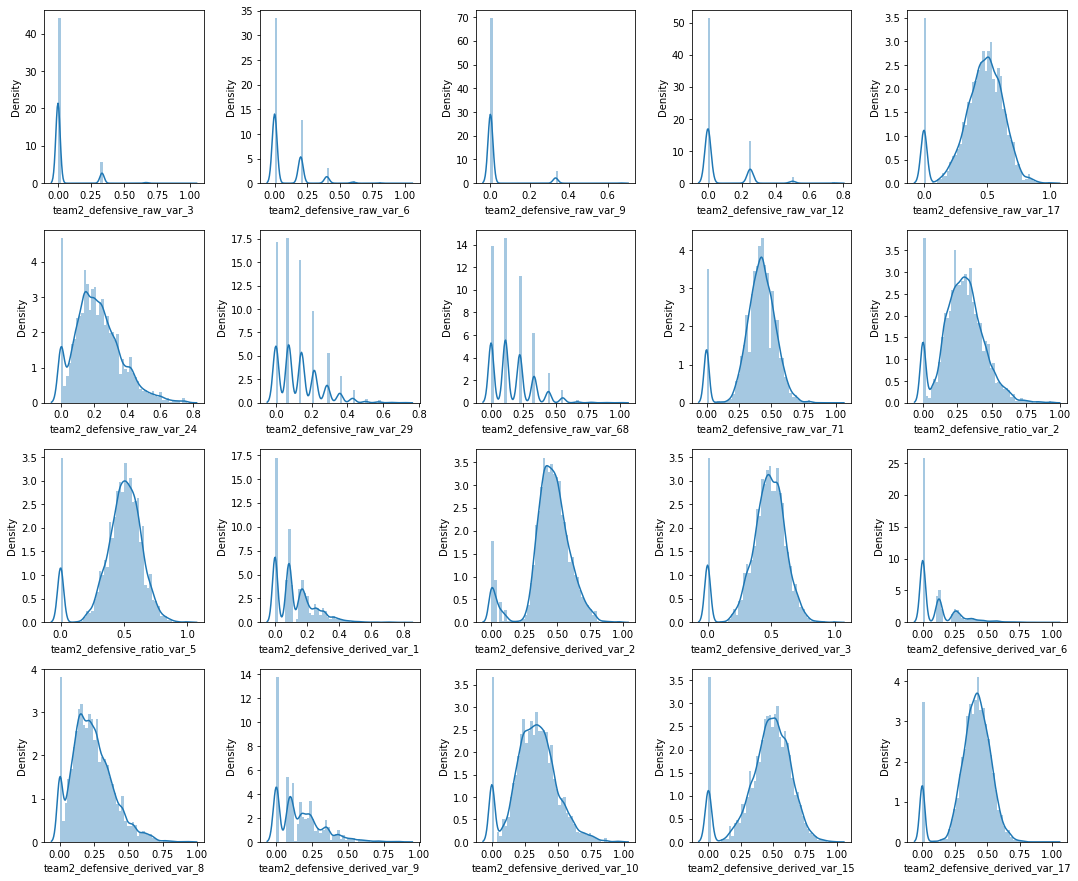

In [178]:
team2_defensive_var  = [var for var in df_train_v1.columns if 'team2_defensive' in var ]
df_team2_defensive = df_train_v1[team2_defensive_var].copy()

#visualise movement
visualise_numrical_data(df_team2_defensive,team2_defensive_var)

__Team2 Offensive__

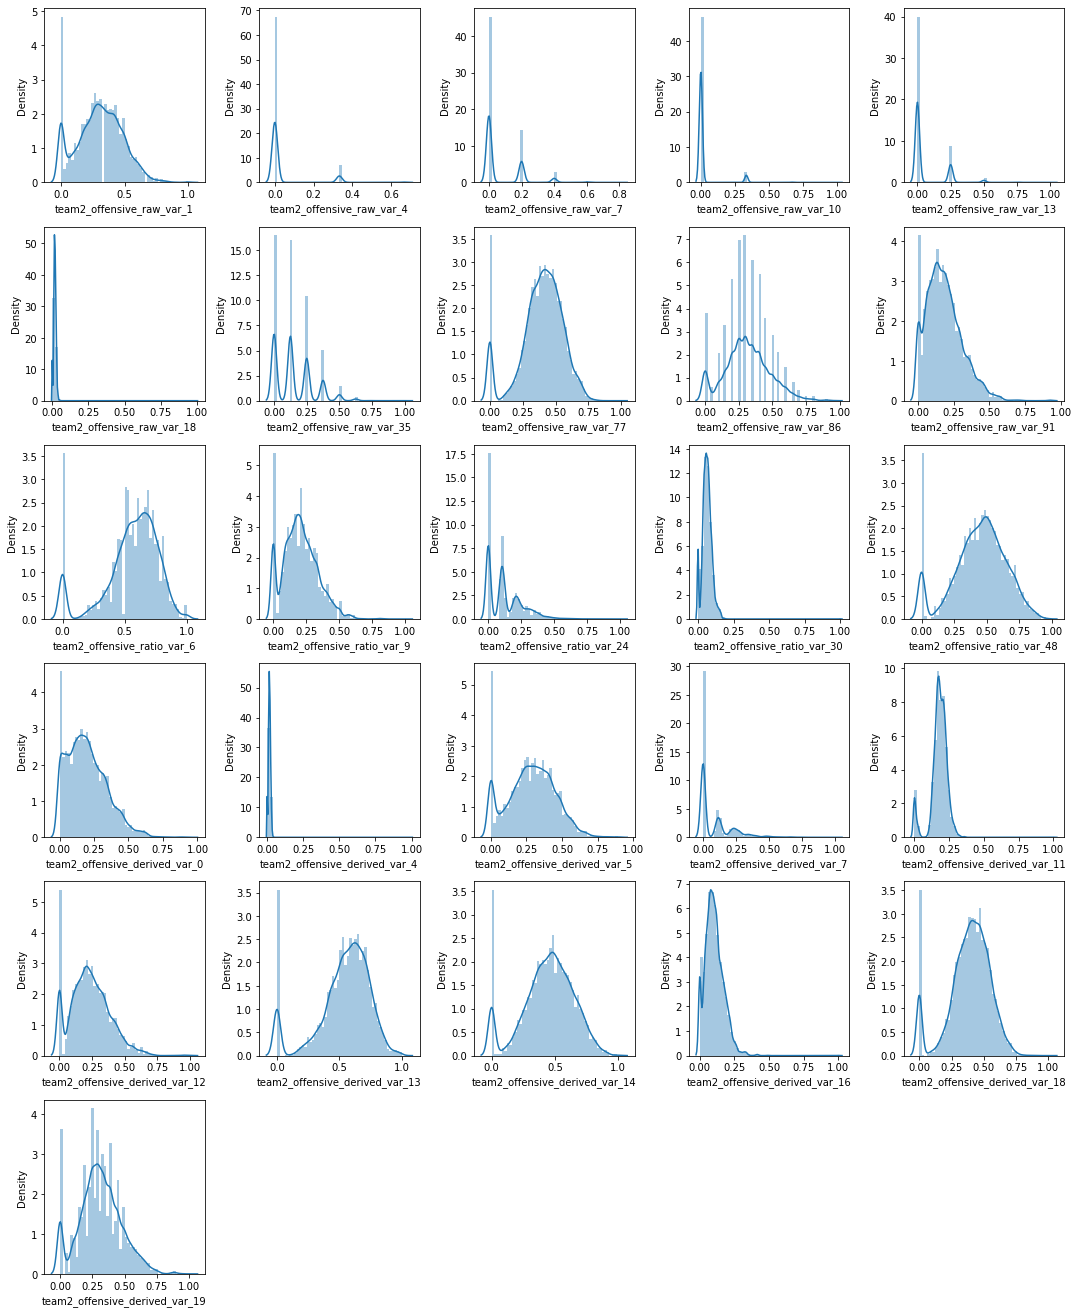

In [179]:
team2_offensive_var  = [var for var in df_train_v1.columns if 'team2_offensive' in var ]
df_team2_offensive = df_train_v1[team2_offensive_var].copy()

#visualise movement
visualise_numrical_data(df_team2_offensive,team2_offensive_var)

__Team2 Other__

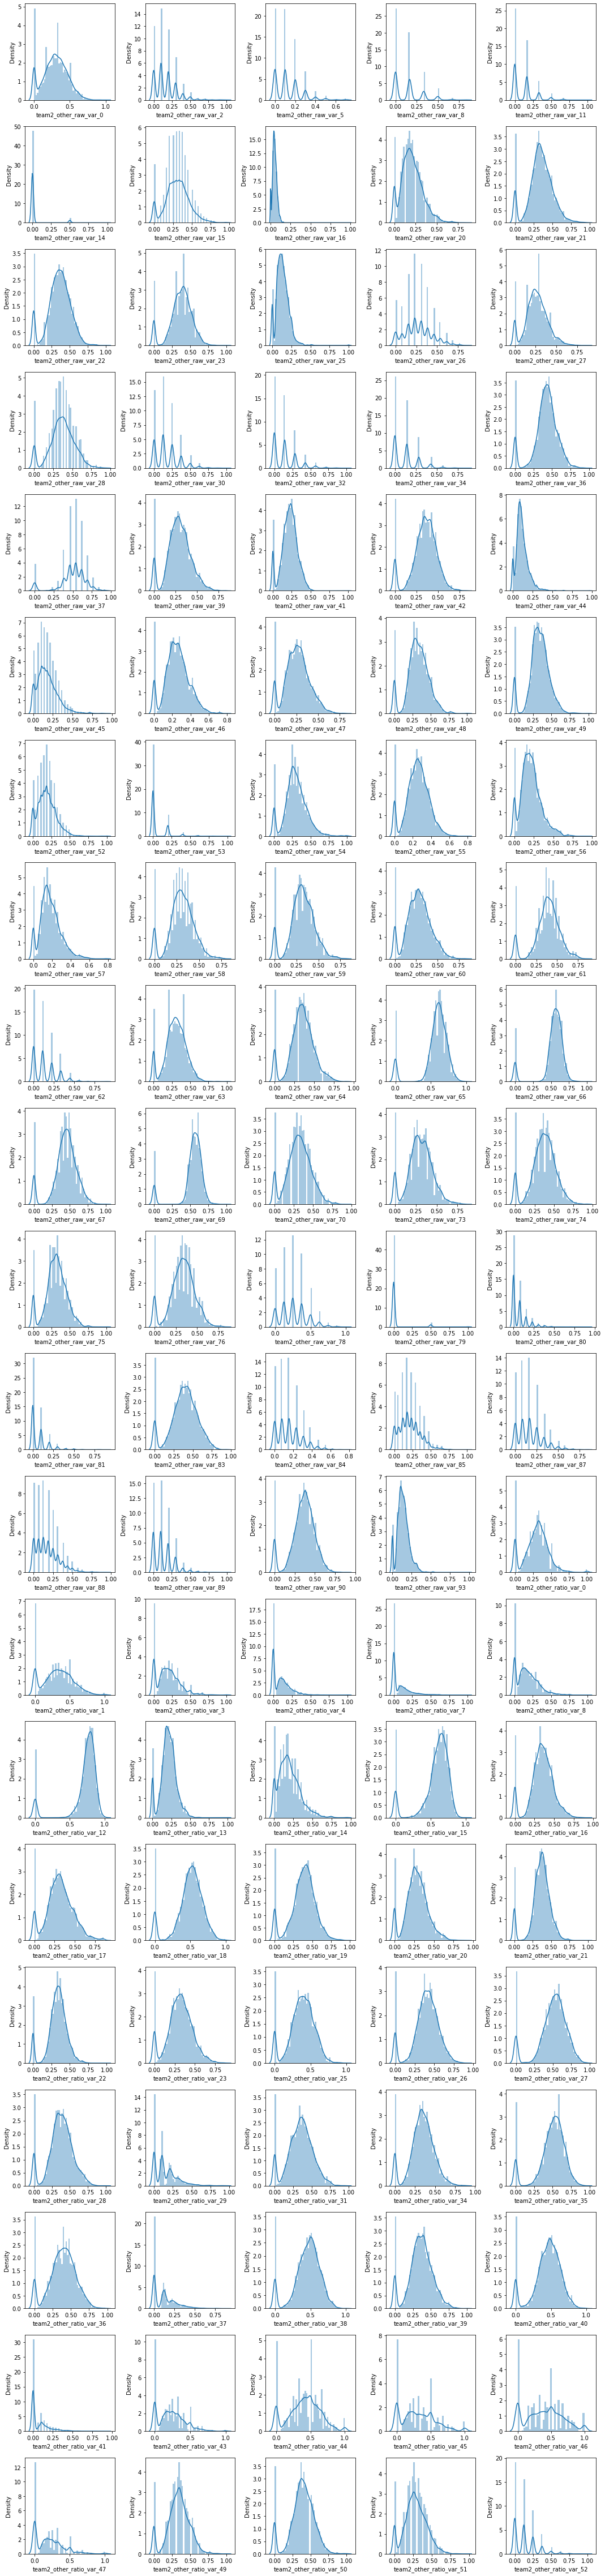

In [180]:
team2_other_var  = [var for var in df_train_v1.columns if 'team2_other' in var ]
df_team2_other = df_train_v1[team2_other_var].copy()

#visualise movement
visualise_numrical_data(df_team2_other,team2_other_var)

In [181]:
replaceStruct = {
     "winner":{'draw':0,'winner':1,'loser':2,},
     "team": {'team1':1, 'team2':2,}    
}

df_train_v2=df_train_v1.replace(replaceStruct)
df_test_v2=df_test_v1.replace(replaceStruct)

## 3. Feature Selection

from the feature engineering we observered that many feature has zero values of have very low variance
we are droping this

In [188]:
#We have selected the low variance variabel into the seperate file, lets upload and remove from the dataset
df_drop_col =pd.read_csv('drop_col.csv')
drop_col = list(df_drop_col['deleted_col'])

In [189]:
#Let's drop same from the dataset
df_train_v2.drop(drop_col, axis = 1, inplace=True)#drop column
df_test_v2.drop(drop_col, axis = 1, inplace=True)#drop column

In [190]:
print(df_train_v2.shape)
print(df_test_v2.shape)

(20453, 491)
(8774, 490)


## 4. Model Training
After trying other regressive model like __XGBRegressor__, RandomForestRegressor, DecisionTreeRegressor, Ridge, LinearRegression
Found that XGBRegressor is most performing model, so doing work on XGBRegressor only


In [191]:
#spliting data into predicted variable and predict variable i.e X and y

# Split the y variable series and x variables dataset
X = df_train_v2.drop([target],axis=1)
y = df_train_v2[target]

print(X.shape)
print(y.shape)

(20453, 490)
(20453,)


In [192]:
# Split the dataset into the training set validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 0, stratify=y)

### Model1 : XGBRegressor

In [195]:
from xgboost import XGBRegressor

#train the model
xgb = XGBRegressor()
model_xgb = xgb.fit(X_train, y_train)

#predict
pred_y = model_xgb.predict(X_val)

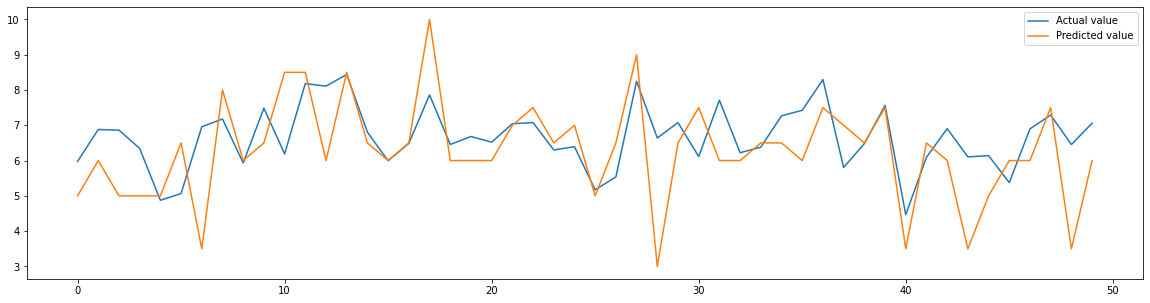

In [204]:
#let's check actual and predicted value

test = pd.DataFrame({'Predicted value':pred_y, 'Actual value':y_val})
fig= plt.figure(figsize=(20,5))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [205]:
#Lets check R2 value

from sklearn.metrics import r2_score
r2 = r2_score(y_val, pred_y)
r2

0.29037789622891974

In [206]:
adjr2=1-((1-r2)*(len(X_val)-1)/(len(X_val)-X_val.shape[1]-1))
adjr2

0.2287809377084894

In [209]:
#Lets submit the submission file to check the r2 score on public data
pred_xgb = model_xgb.predict(df_test_v2)

#maping predicted column to submission file
data_test['xgb'] = np.round(pred_xgb,2)

#genrating csv file to upload
data_test[['row_id','xgb']].to_csv('Submission_xgb.csv', index=False,header=['row_id','rating_num'])

In [210]:
## get r2 score on public data as  0.117612711

#### Model2 : XGBRegressor - Hyperparameter

In [212]:
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)

In [213]:
model = regressor.fit(X_train, y_train)
pred = model.predict(X_val)

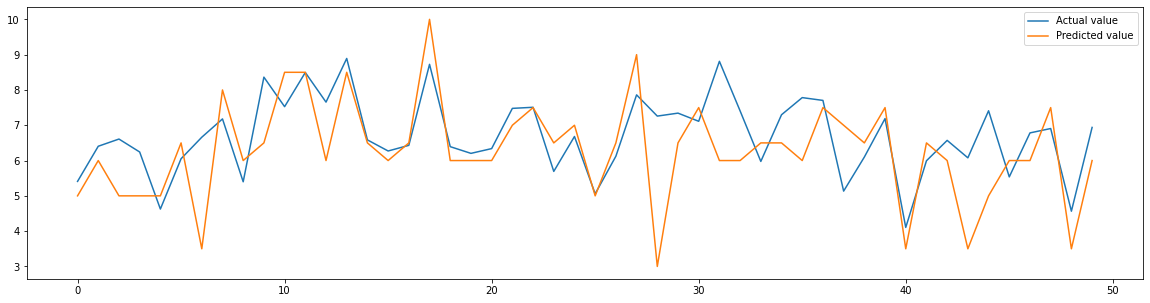

In [214]:
test = pd.DataFrame({'Predicted value':pred, 'Actual value':y_val})
fig= plt.figure(figsize=(20,5))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [215]:
r2 = r2_score(y_val, pred)
r2

0.36572188928804483

In [216]:
adjr2=1-((1-r2)*(len(X_val)-1)/(len(X_val)-X_val.shape[1]-1))
adjr2

0.31066497622358813

In [217]:
#Lets submit the submission file to check the r2 score on public data
pred_xgb_tun = model.predict(df_test_v2)

#maping predicted column to submission file
data_test['xgb_tun'] = np.round(pred_xgb_tun,2)

#genrating csv file to upload
data_test[['row_id','xgb_tun']].to_csv('Submission_xgb_tun.csv', index=False,header=['row_id','rating_num'])

In [ ]:
# R2 0.199419

### Model3 : XGBRegressor - Hyperparameter on full data

In [218]:
model = regressor.fit(X, y)
pred = model.predict(X)

In [220]:
r2 = r2_score(y, pred)
r2

0.9358630483960411

In [221]:
#Lets submit the submission file to check the r2 score on public data
pred_xgb_tun = model.predict(df_test_v2)

#maping predicted column to submission file
data_test['xgb_tun'] = np.round(pred_xgb_tun,2)

#genrating csv file to upload
data_test[['row_id','xgb_tun']].to_csv('Submission_xgb_tun.csv', index=False,header=['row_id','rating_num'])

In [222]:
## R2 0.2396013

__Summary__

* after doing lots of experiment and finding all insight, individual to player, team, we build the best model